# PCA by gradient descent
## Will Townes

This code was originally based on https://gist.github.com/ahwillia/4c10830640d325e0cab978bc18c6263a 

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
N = 100 #number of observations
J = 200 #number of features
L = 5 #number of latent dimensions
df = (N+J)*L

# generate data
U_true = np.random.randn(N,L)
V_true = np.random.randn(J,L)
Y_true = U_true @ V_true.T
Y_tf = tf.constant(Y_true.astype(np.float32))
denom = tf.constant(float(N*J-df))

U = tf.Variable(np.random.randn(N,L).astype(np.float32))
V = tf.Variable(np.random.randn(J,L).astype(np.float32))

# regularization 
alpha = 1e-4
alphaU = tf.constant(float(alpha/(N*L)))
alphaV = tf.constant(float(alpha/(J*L)))

# optimization setup
optimizer = tf.keras.optimizers.Adam(0.01)
loss_history = []
obj_history = []

def train_step(U,V):
    with tf.GradientTape() as tape:
        Y_est = tf.matmul(U,tf.transpose(V))
        loss = tf.reduce_sum((Y_tf-Y_est)**2)/denom
    # Add asserts to check the shape of the output.
    tf.debugging.assert_equal(Y_est.shape, (N, J))
    loss_history.append(loss.numpy())
    # regularized loss
    regU = alphaU*tf.reduce_sum(U**2)
    regV = alphaV*tf.reduce_sum(V**2)
    objective = loss + regU + regV
    obj_history.append(objective.numpy())
    # compute gradients
    grads = tape.gradient(loss, [U,V])
    optimizer.apply_gradients(zip(grads, [U,V]))

#def train(epochs):
#  for epoch in range(epochs):
#    for (batch, (images, labels)) in enumerate(dataset):
#      train_step(images, labels)
#    print ('Epoch {} finished'.format(epoch))

def train(iters):
    for i in range(iters):
        train_step(U,V)
        msg = 'Iteration: {}, loss: {:.3E}, objective: {:.3E}'
        if i%100==0:
            print(msg.format(i,loss_history[i],obj_history[i]))
            
train(1000)

Iteration: 0, loss: 1.075E+01, objective: 1.075E+01
Iteration: 100, loss: 4.808E+00, objective: 4.808E+00
Iteration: 200, loss: 1.413E+00, objective: 1.413E+00
Iteration: 300, loss: 2.251E-01, objective: 2.253E-01
Iteration: 400, loss: 3.506E-02, objective: 3.526E-02
Iteration: 500, loss: 5.569E-03, objective: 5.775E-03
Iteration: 600, loss: 8.693E-04, objective: 1.076E-03
Iteration: 700, loss: 1.234E-04, objective: 3.302E-04
Iteration: 800, loss: 1.492E-05, objective: 2.217E-04
Iteration: 900, loss: 1.486E-06, objective: 2.083E-04


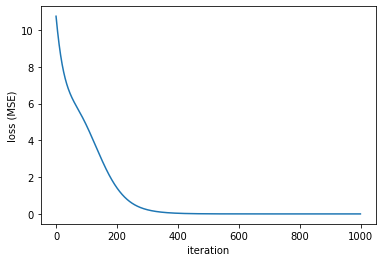

In [3]:
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss (MSE)');